In [3]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
# import cv2/
import numpy as np
import csv
import time
from packaging import version

from collections import defaultdict
from io import StringIO
# from matplotlib import pyplot as plt
from PIL import Image

# Object detection imports
from utils import label_map_util
from utils import visualization_utils as vis_util

ModuleNotFoundError: No module named 'PIL'

In [2]:
# Variables
total_passed_vehicle = 0  # using it to count vehicles

# By default I use an "SSD with Mobilenet" model here. See the detection model zoo (https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md) for a list of other models that can be run out-of-the-box with varying speeds and accuracies.
# What model to download.
MODEL_NAME = 'ssd_mobilenet_v1_coco_2018_01_28'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = \
    'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')

NUM_CLASSES = 90

In [3]:
# Download Model
# uncomment if you have not download the model yet
# Load a (frozen) Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

# Loading label map
# Label maps map indices to category names, so that when our convolution network predicts 5, we know that this corresponds to airplane. Here I use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map,
        max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


W1208 02:43:28.158839 139927283644224 deprecation_wrapper.py:119] From /home/utils/label_map_util.py:116: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.



In [4]:
sess = tf.Session(graph=detection_graph)

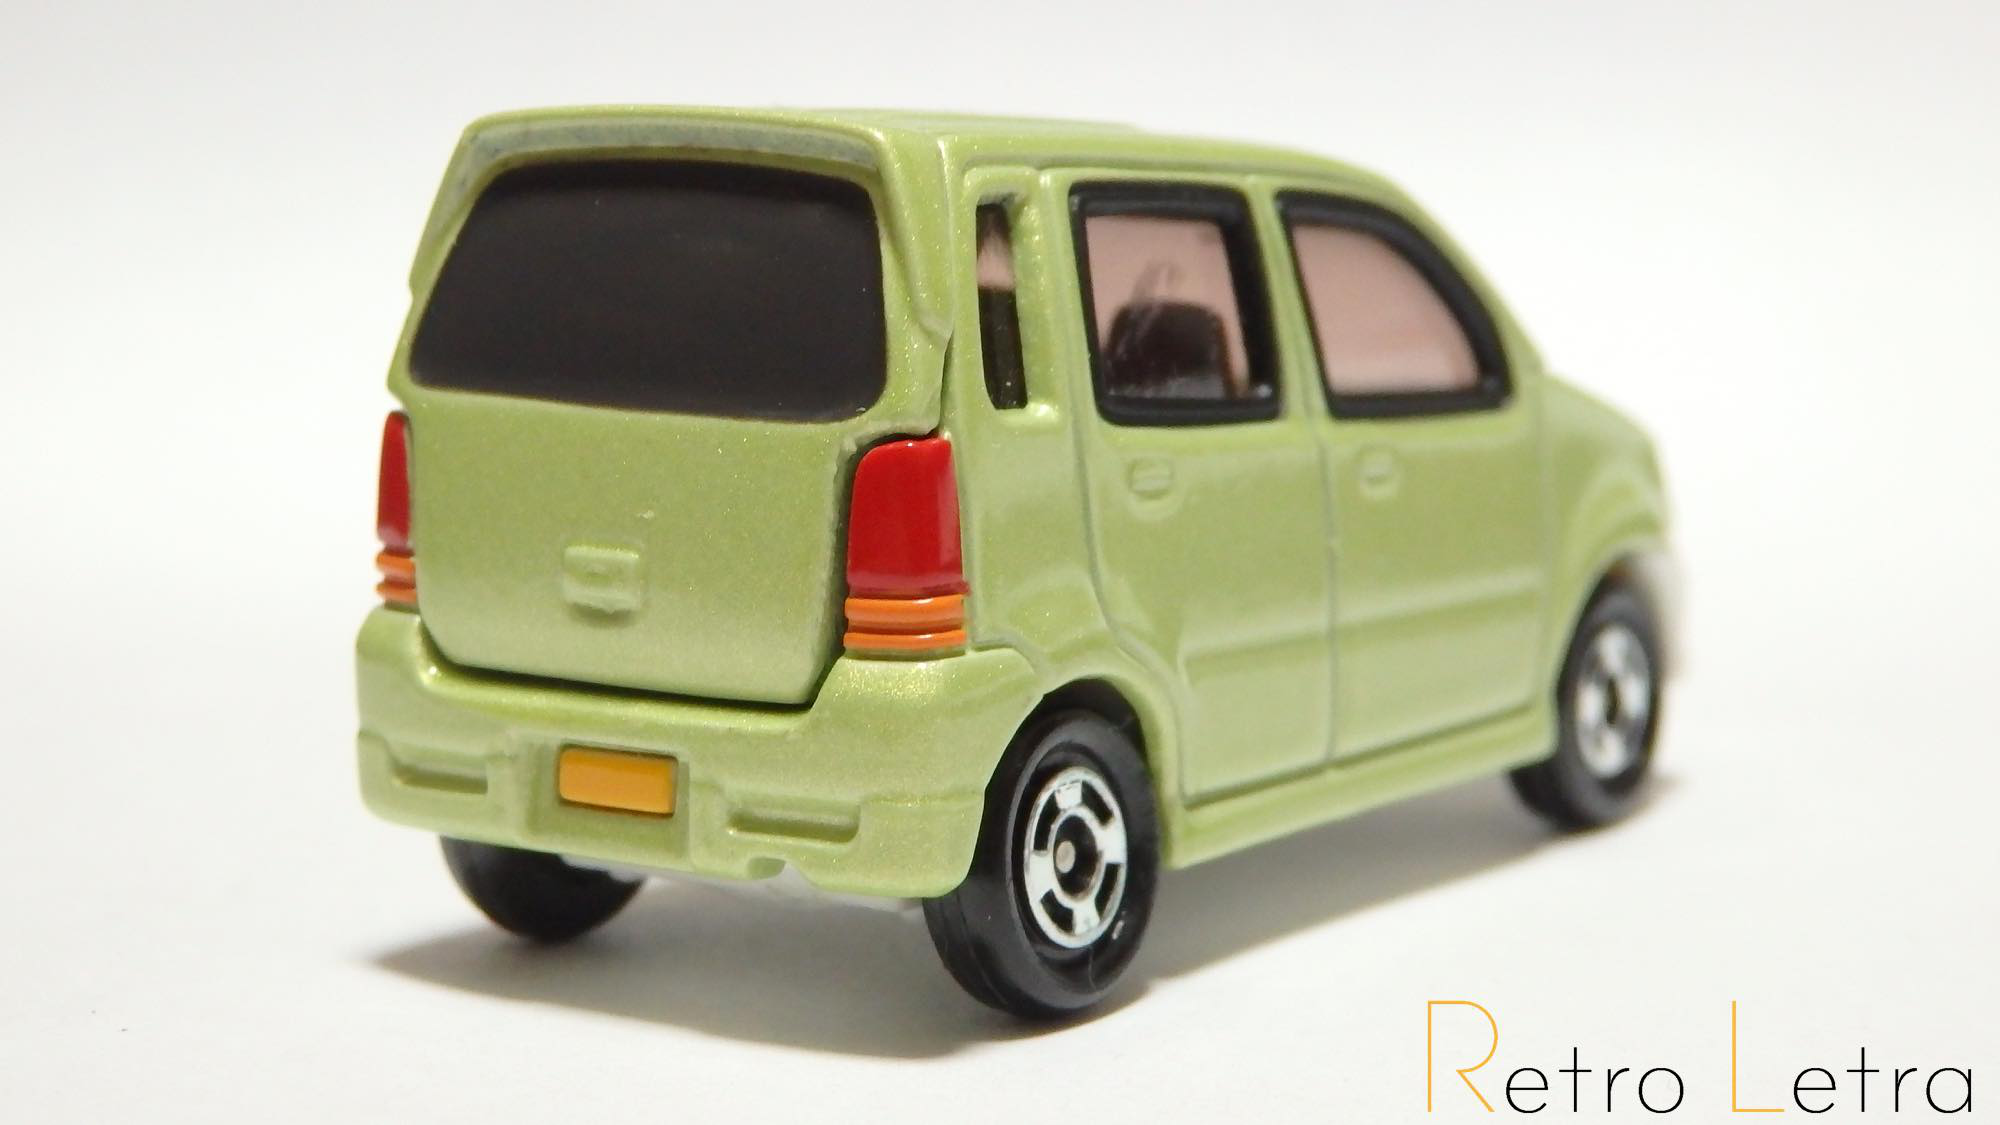

In [5]:
img = Image.open('./th_P3120124.jpg')
img

In [6]:
np_image = np.array(img)

In [7]:
image_np_expanded = np.expand_dims(np_image, axis=0)

In [8]:
# Definite input and output Tensors for detection_graph
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

# Each box represents a part of the image where a particular object was detected.
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

# Each score represent how level of confidence for each of the objects.
# Score is shown on the result image, together with the class label.
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
num_detections = detection_graph.get_tensor_by_name('num_detections:0')

In [9]:
%%time
(boxes, scores, classes, num) = sess.run([detection_boxes, detection_scores,
                             detection_classes, num_detections],
                             feed_dict={image_tensor: image_np_expanded})

CPU times: user 2.16 s, sys: 88.3 ms, total: 2.24 s
Wall time: 2.23 s


In [10]:
result = vis_util.visualize_boxes_and_labels_on_image_array(
                    1,
                    np_image,
                    np.squeeze(boxes),
                    np.squeeze(classes).astype(np.int32),
                    np.squeeze(scores),
                    category_index,
                    use_normalized_coordinates=True,
                    line_thickness=4,
                    )

In [11]:
result_img = Image.fromarray(np_image)

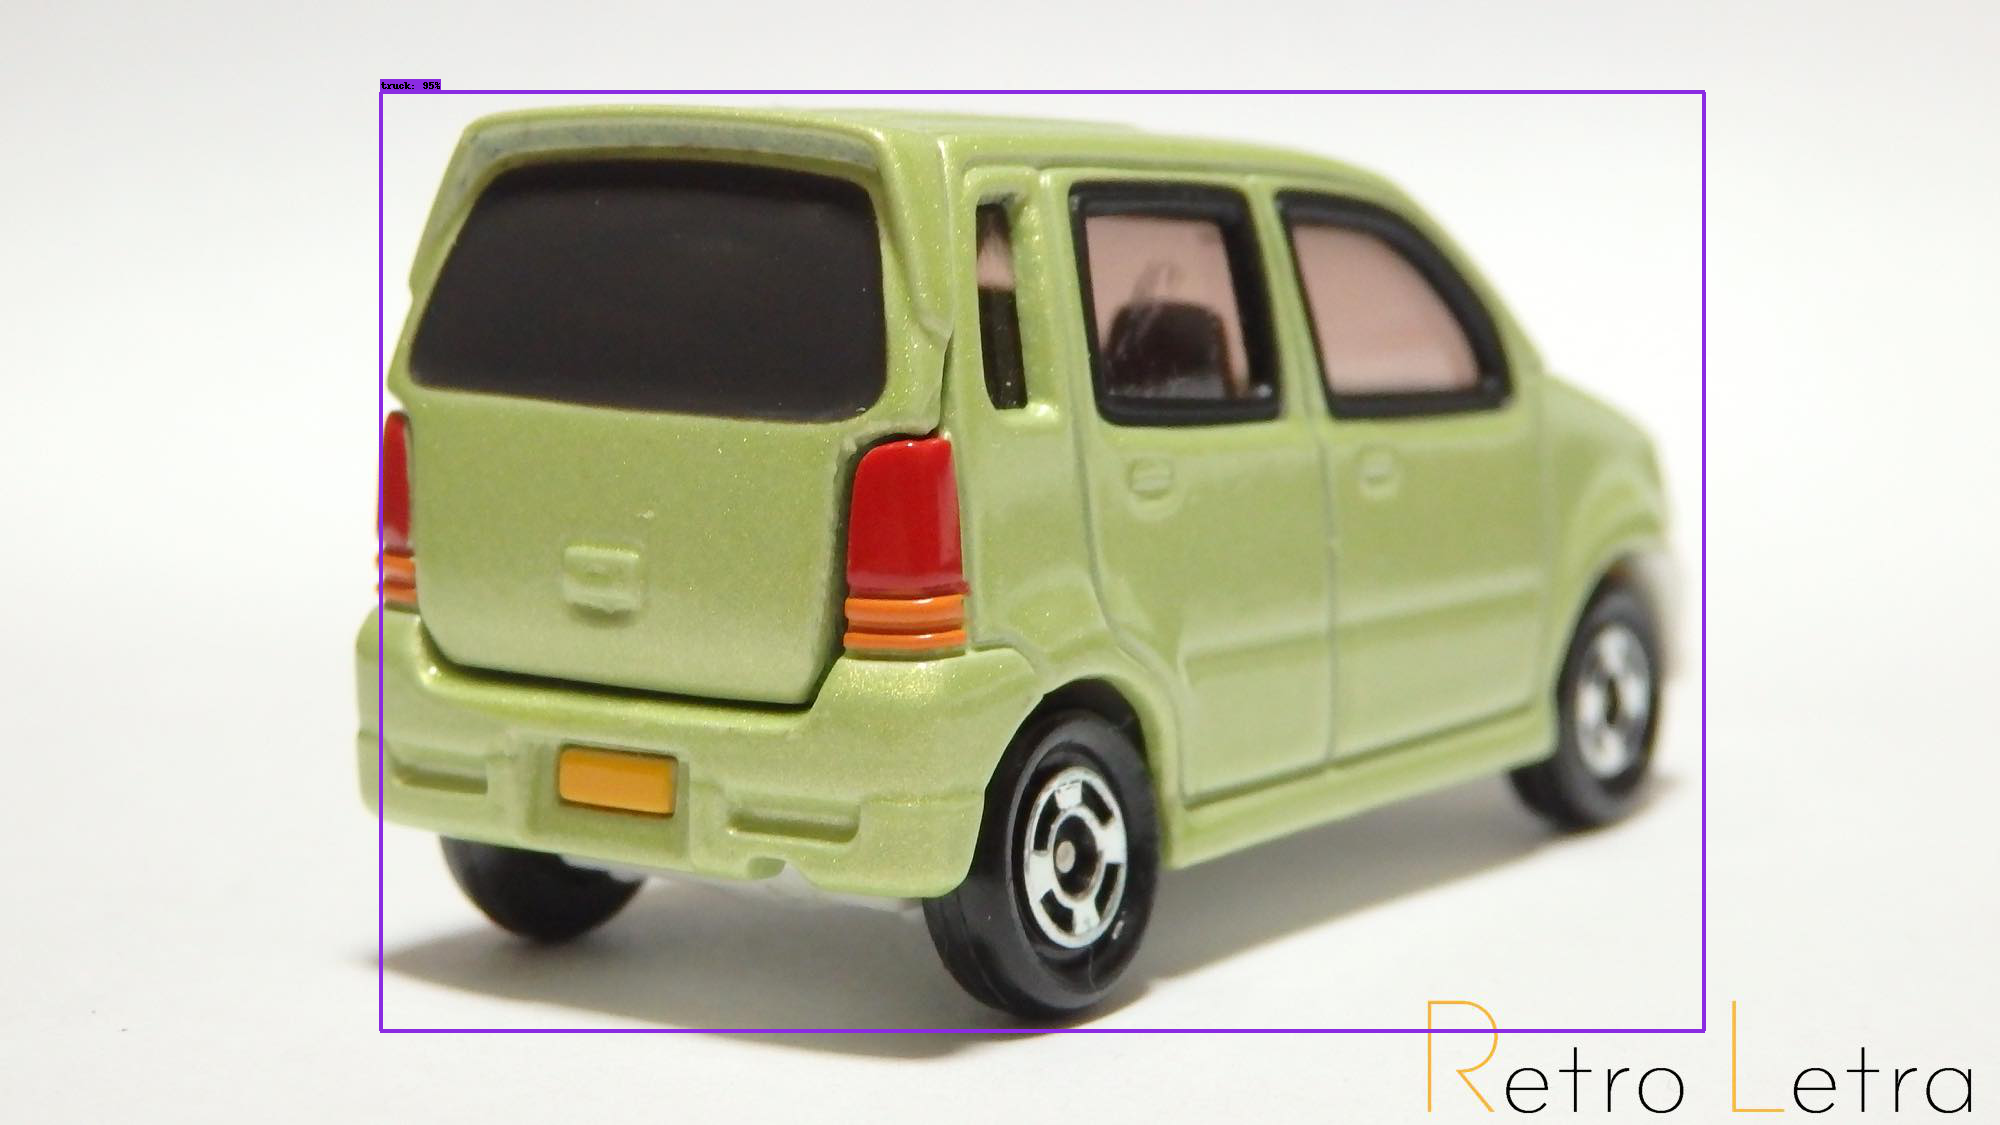

In [12]:
result_img

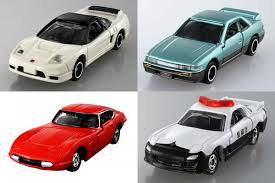

In [96]:
img = Image.open('./images.jpeg')
img

In [97]:
np_image = np.array(img)

In [98]:
image_np_expanded = np.expand_dims(np_image, axis=0)

In [99]:
# Definite input and output Tensors for detection_graph
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

# Each box represents a part of the image where a particular object was detected.
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

# Each score represent how level of confidence for each of the objects.
# Score is shown on the result image, together with the class label.
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
num_detections = detection_graph.get_tensor_by_name('num_detections:0')

In [100]:
%time
(boxes, scores, classes, num) = sess.run([detection_boxes, detection_scores,
                             detection_classes, num_detections],
                             feed_dict={image_tensor: image_np_expanded})

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 21 µs


In [101]:
result = vis_util.visualize_boxes_and_labels_on_image_array(
                    1,
                    np_image,
                    np.squeeze(boxes),
                    np.squeeze(classes).astype(np.int32),
                    np.squeeze(scores),
                    category_index,
                    use_normalized_coordinates=True,
                    line_thickness=4,
                    )

In [102]:
result_img = Image.fromarray(np_image)

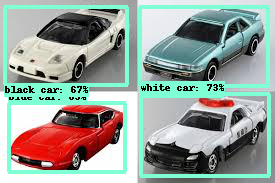

In [103]:
result_img